In [67]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [68]:
analysis = scripts.Analysis()

In [69]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1.e-26_max_1.e-22_ng_4',
                          'wgt_1_.6_.4_.3',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [70]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'h2o',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_1.e-26_max_1.e-22_ng_4',
                               'wgt_1_.6_.4_.3',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [71]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [72]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [73]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [74]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [75]:
fig.display_hrefanchor()

In [76]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [77]:
table_dgdgs.display_hrefanchor()

In [78]:
for g in [1, 2, 3, 4]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

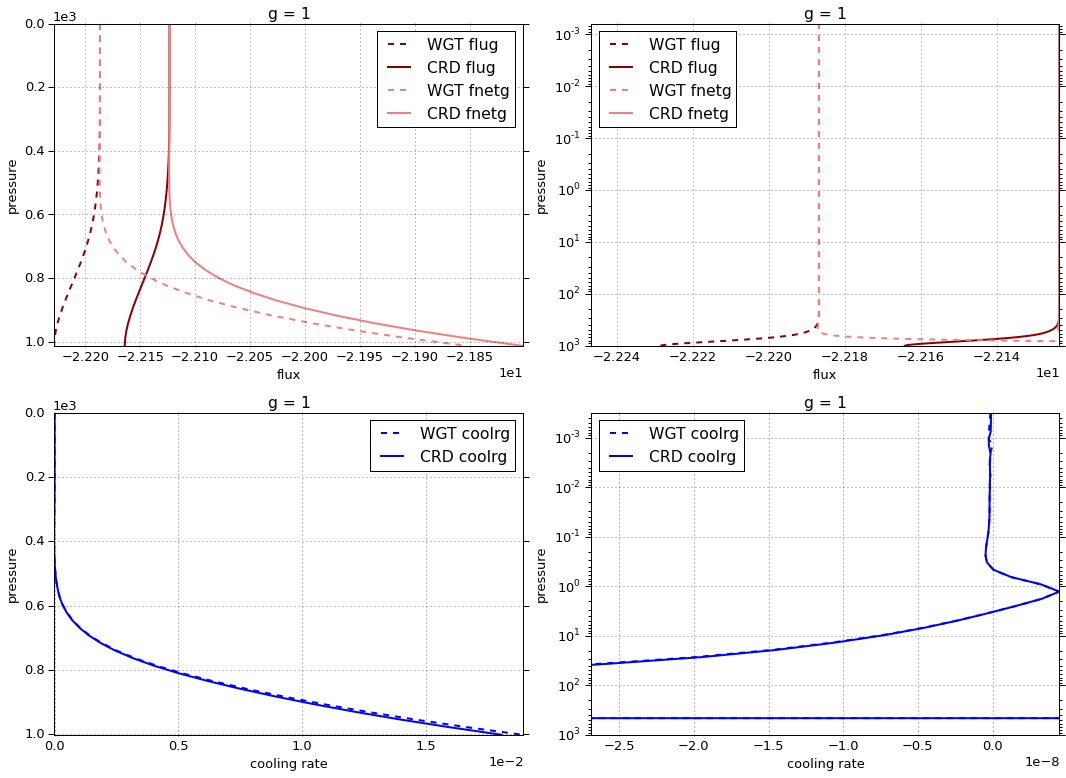

# Figure: flux, cooling rate. g-group 2

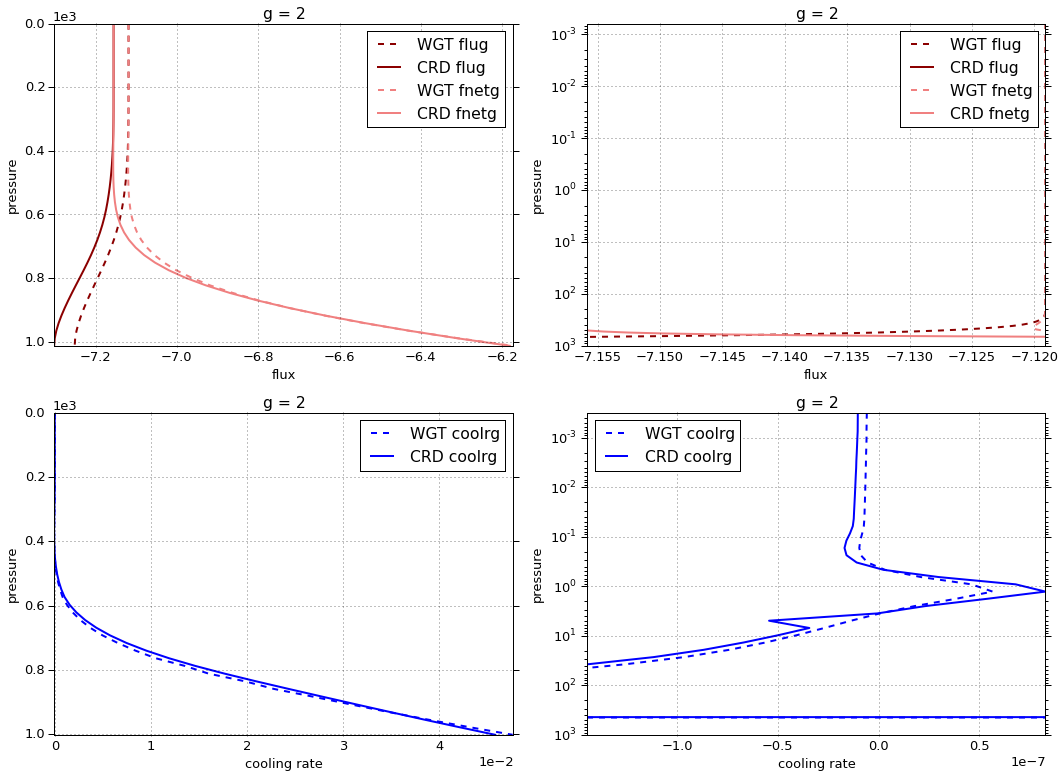

# Figure: flux, cooling rate. g-group 3

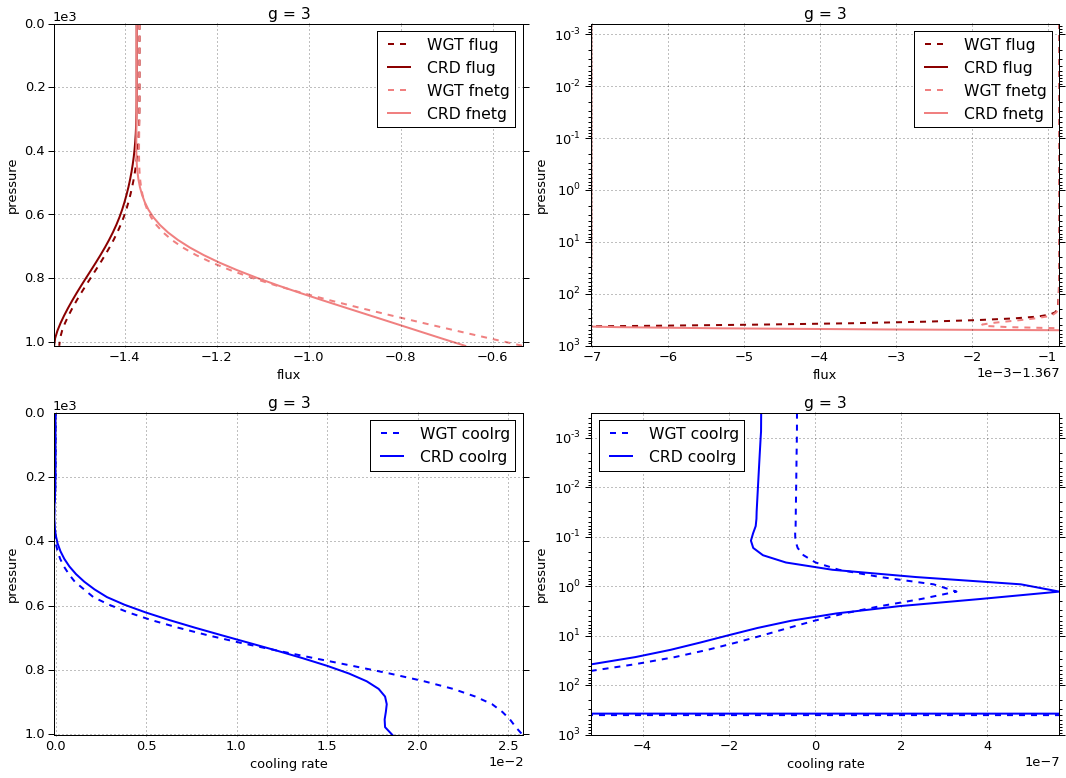

# Figure: flux, cooling rate. g-group 4

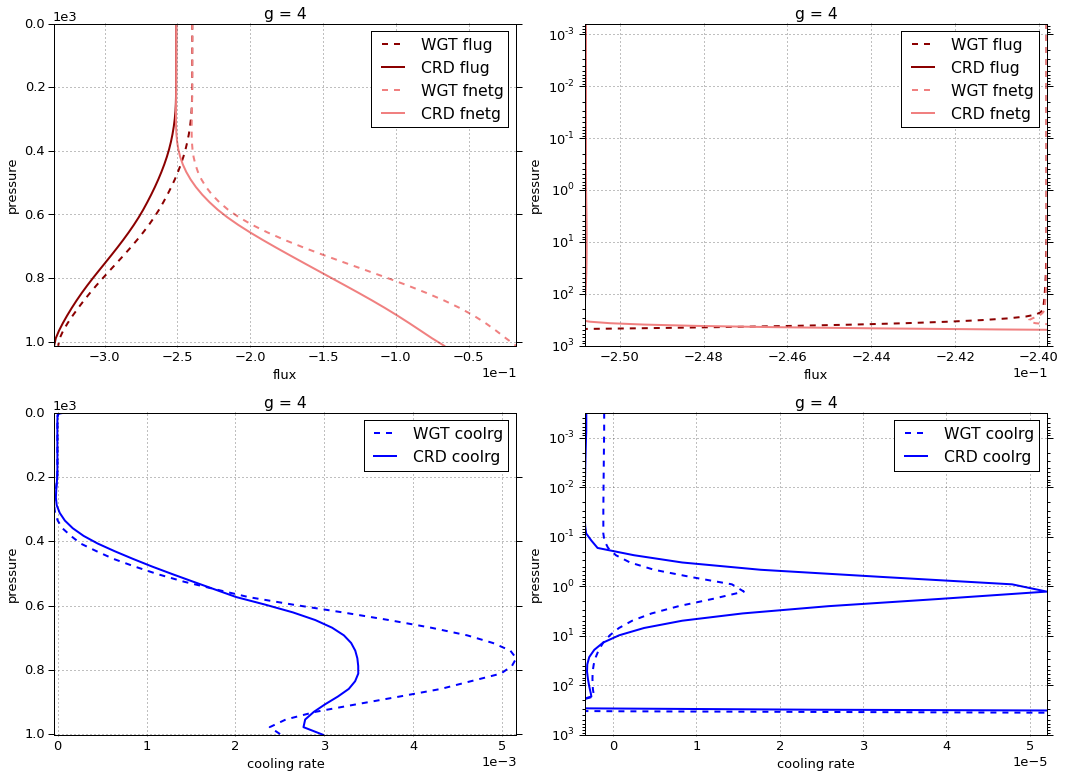

# Figure: flux, cooling rate. g-group total

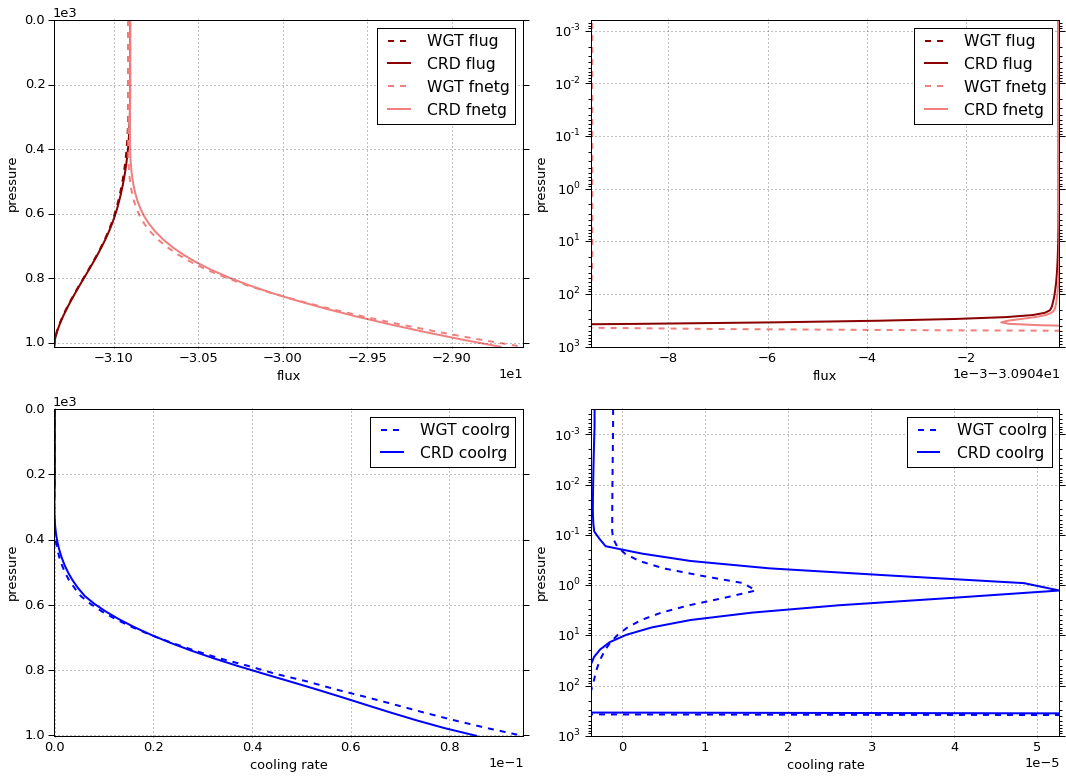

In [80]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [81]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -22.123475  0.000000 -22.123475
  1013     76    -22.164162  0.362038 -21.802125
2 0        1      -7.155860  0.000000  -7.155860
  1013     76     -7.302097  1.120792  -6.181305
3 0        1      -1.374012  0.000000  -1.374012
  1013     76     -1.553392  0.893613  -0.659778
4 0        1      -0.250801  0.000000  -0.250801
  1013     76     -0.334584  0.267663  -0.066921


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -22.186739  0.000000 -22.186739
  1013     76    -22.228442  0.375290 -21.853153
2 0        1      -7.119119  0.000000  -7.119119
  1013     76     -7.251638  1.077541  -6.174097
3 0        1      -1.367848  0.000000  -1.367848
  1013     76     -1.542325  1.007259  -0.535066
4 0        1      -0.239823  0.000000  -0.239823
  1013     76     -0.331830  0.314285  -0.017545


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -0.063264  0.000000 -0.063264
  1013     76    -0.064280  0.013252 -0.051028
2 0        1      0.036741  0.000000  0.036741
  1013     76     0.050459 -0.043252  0.007207
3 0        1      0.006164  0.000000  0.006164
  1013     76     0.011067  0.113646  0.124713
4 0        1      0.010978  0.000000  0.010978
  1013     76     0.002754  0.046622  0.049376

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -9.606521e-11
  1001.112500 75     1.806417e-02
2 0.000312    1     -1.036304e-08
  1001.112500 75     4.585461e-02
3 0.000312    1     -1.247497e-07
  1001.112500 75     1.859484e-02
4 0.000312    1     -3.202627e-06
  1001.112500 75     2.986781e-03


WGT


coolrg
g pressure    layer              
1 0.000312    1     -1.440978e-10
  1001.112500 75     1.890876e-02
2 0.000312    1     -5.896003e-09
  1001.112500 75     4.767618e-02
3 0.000312    1     -4.154520e-08
  1001.112500 75     2.578858e-02
4 0.000312    1     -1.057803e-06
  1001.112500 75     2.514708e-03


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -4.803261e-11
  1001.112500 75     8.445930e-04
2 0.000312    1      4.467033e-09
  1001.112500 75     1.821568e-03
3 0.000312    1      8.320449e-08
  1001.112500 75     7.193740e-03
4 0.000312    1      2.144824e-06
  1001.112500 75    -4.720731e-04

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-30.904148,0.000000,-30.904148
1013,76,-31.354235,2.644106,-28.710129



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-30.913529,0.000000,-30.913529
1013,76,-31.354235,2.774374,-28.579861



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-9.380530e-03,0.000000,-0.009381
1013,76,-6.000000e-08,0.130268,0.130268


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000003
1001.112500,75,0.085500



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000001
1001.112500,75,0.094888



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.000002
1001.112500,75,0.009388


In [82]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.702125,0.708945
2,0.236625,0.231281
3,0.050375,0.049190
4,0.010875,0.010583


In [83]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

wgt                                           crd        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -22.186739  0.000000e+00 -22.186739   1     1   
0.000624      1     2 -22.186739  1.889010e-15 -22.186739   1     2   
0.000876      1     3 -22.186739  3.153270e-15 -22.186739   1     3   
0.001229      1     4 -22.186739  3.797698e-15 -22.186739   1     4   
0.001723      1     5 -22.186739  5.696546e-15 -22.186739   1     5   
0.002417      1     6 -22.186739  8.225065e-15 -22.186739   1     6   
0.003391      1     7 -22.186739  1.140293e-14 -22.186739   1     7   
0.004757      1     8 -22.186739  1.646981e-14 -22.186739   1     8   
0.006672      1     9 -22.186739  2.469487e-14 -22.186739   1     9   
0.009359      1    10 -22.186739  3.862632e-14 -22.186739   1    10   
0.013128      1    11 -22.186739  5.445662e-14 -22.186739   1    11   
0.018415      1    12 -22.186739  8.231952e-14 -22.186739   1    12   
0.025830      1    13 -22.186739  1.215854e-13 -22.186739   1    13   
0.036232      1    14 -22.186739  1.798790e-13 -22.186739   1    14   
0.050823      1    15 -22.186739  2.737490e-13 -22.186739   1    15   
0.071291      1    16 -22.186739  4.285298e-13 -22.186739   1    16   
0.100000      1    17 -22.186739  7.602479e-13 -22.186739   1    17   
0.140271      1    18 -22.186739  1.576379e-12 -22.186739   1    18   
0.196760      1    19 -22.186739  3.659642e-12 -22.186739   1    19   
0.275997      1    20 -22.186739  9.053553e-12 -22.186739   1    20   
0.387100      1    21 -22.186739  2.317060e-11 -22.186739   1    21   
0.543100      1    22 -22.186739  6.052137e-11 -22.186739   1    22   
0.761700      1    23 -22.186739  1.588573e-10 -22.186739   1    23   
1.068500      1    24 -22.186739  3.920817e-10 -22.186739   1    24   
1.498800      1    25 -22.186739  8.059106e-10 -22.186739   1    25   
2.102400      1    26 -22.186739  1.361995e-09 -22.186739   1    26   
2.949000      1    27 -22.186739  2.077981e-09 -22.186739   1    27   
4.136600      1    28 -22.186739  3.015077e-09 -22.186739   1    28   
5.802500      1    29 -22.186739  4.275707e-09 -22.186739   1    29   
8.139200      1    30 -22.186739  6.026937e-09 -22.186739   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -22.186858  4.942080e-05 -22.186809   1    47   
347.300000    1    48 -22.186941  9.346708e-05 -22.186847   1    48   
371.075000    1    49 -22.187058  1.644534e-04 -22.186894   1    49   
394.850000    1    50 -22.187221  2.751703e-04 -22.186946   1    50   
418.625000    1    51 -22.187440  4.428508e-04 -22.186997   1    51   
442.400000    1    52 -22.187728  6.901997e-04 -22.187038   1    52   
466.175000    1    53 -22.188092  1.039197e-03 -22.187053   1    53   
489.950000    1    54 -22.188541  1.518611e-03 -22.187022   1    54   
513.725000    1    55 -22.189087  2.167672e-03 -22.186919   1    55   
537.500000    1    56 -22.189744  3.035304e-03 -22.186709   1    56   
561.275000    1    57 -22.190525  4.181809e-03 -22.186343   1    57   
585.050000    1    58 -22.191443  5.681971e-03 -22.185761   1    58   
608.825000    1    59 -22.192563  7.721301e-03 -22.184842   1    59   
632.600000    1    60 -22.193914  1.046698e-02 -22.183447   1    60   
656.375000    1    61 -22.195508  1.409963e-02 -22.181408   1    61   
680.150000    1    62 -22.197354  1.883223e-02 -22.178522   1    62   
703.925000    1    63 -22.199449  2.490631e-02 -22.174542   1    63   
727.700000    1    64 -22.201779  3.259840e-02 -22.169180   1    64   
751.475000    1    65 -22.204318  4.221969e-02 -22.162098   1    65   
775.250000    1    66 -22.207025  5.411074e-02 -22.152914   1    66   
799.025000    1    67 -22.209846  6.863806e-02 -22.141208   1    67   
822.800000    1    68 -22.212715  8.618091e-02 -22.126534   1    68   
846.575000    1    69 -22.215562  1.

In [84]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -7.119119  0.000000e+00 -7.119119   2     1 -7.155860   
0.000624      2     2 -7.119119  8.175667e-14 -7.119119   2     2 -7.155860   
0.000876      2     3 -7.119119  1.153860e-13 -7.119119   2     3 -7.155860   
0.001229      2     4 -7.119119  1.641681e-13 -7.119119   2     4 -7.155860   
0.001723      2     5 -7.119119  2.354292e-13 -7.119119   2     5 -7.155860   
0.002417      2     6 -7.119119  3.391496e-13 -7.119119   2     6 -7.155860   
0.003391      2     7 -7.119119  4.903570e-13 -7.119119   2     7 -7.155860   
0.004757      2     8 -7.119119  7.107618e-13 -7.119119   2     8 -7.155860   
0.006672      2     9 -7.119119  1.032788e-12 -7.119119   2     9 -7.155860   
0.009359      2    10 -7.119119  1.502914e-12 -7.119119   2    10 -7.155860   
0.013128      2    11 -7.119119  2.189299e-12 -7.119119   2    11 -7.155860   
0.018415      2    12 -7.119119  3.191081e-12 -7.119119   2    12 -7.155860   
0.025830      2    13 -7.119119  4.657190e-12 -7.119119   2    13 -7.155860   
0.036232      2    14 -7.119119  6.803380e-12 -7.119119   2    14 -7.155860   
0.050823      2    15 -7.119119  9.982800e-12 -7.119119   2    15 -7.155860   
0.071291      2    16 -7.119119  1.510461e-11 -7.119119   2    16 -7.155860   
0.100000      2    17 -7.119119  2.500537e-11 -7.119119   2    17 -7.155860   
0.140271      2    18 -7.119119  4.682685e-11 -7.119119   2    18 -7.155860   
0.196760      2    19 -7.119119  9.630407e-11 -7.119119   2    19 -7.155860   
0.275997      2    20 -7.119119  2.095982e-10 -7.119119   2    20 -7.155860   
0.387100      2    21 -7.119119  4.716181e-10 -7.119119   2    21 -7.155860   
0.543100      2    22 -7.119119  1.085036e-09 -7.119119   2    22 -7.155860   
0.761700      2    23 -7.119119  2.518186e-09 -7.119119   2    23 -7.155860   
1.068500      2    24 -7.119119  5.552314e-09 -7.119119   2    24 -7.155860   
1.498800      2    25 -7.119119  1.037397e-08 -7.119119   2    25 -7.155860   
2.102400      2    26 -7.119119  1.611621e-08 -7.119119   2    26 -7.155860   
2.949000      2    27 -7.119119  2.261158e-08 -7.119119   2    27 -7.155860   
4.136600      2    28 -7.119119  3.011098e-08 -7.119119   2    28 -7.155860   
5.802500      2    29 -7.119119  3.913588e-08 -7.119119   2    29 -7.155860   
8.139200      2    30 -7.119119  5.055541e-08 -7.119119   2    30 -7.155860   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -7.119581  2.012525e-04 -7.119380   2    47 -7.156386   
347.300000    2    48 -7.119896  3.777953e-04 -7.119518   2    48 -7.156742   
371.075000    2    49 -7.120338  6.597852e-04 -7.119678   2    49 -7.157243   
394.850000    2    50 -7.120943  1.095637e-03 -7.119847   2    50 -7.157926   
418.625000    2    51 -7.121748  1.749703e-03 -7.119998   2    51 -7.158835   
442.400000    2    52 -7.122796  2.705588e-03 -7.120090   2    52 -7.160015   
466.175000    2    53 -7.124103  4.041623e-03 -7.120062   2    53 -7.161487   
489.950000    2    54 -7.125696  5.859421e-03 -7.119837   2    54 -7.163276   
513.725000    2    55 -7.127610  8.296594e-03 -7.119314   2    55 -7.165423   
537.500000    2    56 -7.129885  1.152220e-02 -7.118362   2    56 -7.167972   
561.275000    2    57 -7.132554  1.574122e-02 -7.116813   2    57 -7.170961   
585.050000    2    58 -7.135706  2.120365e-02 -7.114502   2    58 -7.174426   
608.825000    2    59 -7.139488  2.854766e-02 -7.110941   2    59 -7.178597   
632.600000    2    60 -7.143998  3.831988e-02 -7.105678   2    60 -7.183554   
656.375000    2    61 -7.149259  5.108677e-02 -7.098172   2    61 -7.189331   
680.150000    2    62 -7.155301  6.749366e-02 -7.087807   2    62 -7.195935   
703.925000    2    63 -7.162054  8.823925e-02 -7.073815   2   

In [85]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -1.367848  0.000000e+00 -1.367848   3     1 -1.374012   
0.000624      3     2 -1.367848  6.957598e-13 -1.367848   3     2 -1.374012   
0.000876      3     3 -1.367848  9.807584e-13 -1.367848   3     3 -1.374012   
0.001229      3     4 -1.367848  1.391265e-12 -1.367848   3     4 -1.374012   
0.001723      3     5 -1.367848  1.986001e-12 -1.367848   3     5 -1.374012   
0.002417      3     6 -1.367848  2.847532e-12 -1.367848   3     6 -1.374012   
0.003391      3     7 -1.367848  4.095773e-12 -1.367848   3     7 -1.374012   
0.004757      3     8 -1.367848  5.904445e-12 -1.367848   3     8 -1.374012   
0.006672      3     9 -1.367848  8.525290e-12 -1.367848   3     9 -1.374012   
0.009359      3    10 -1.367848  1.232395e-11 -1.367848   3    10 -1.374012   
0.013128      3    11 -1.367848  1.783090e-11 -1.367848   3    11 -1.374012   
0.018415      3    12 -1.367848  2.581772e-11 -1.367848   3    12 -1.374012   
0.025830      3    13 -1.367848  3.740709e-11 -1.367848   3    13 -1.374012   
0.036232      3    14 -1.367848  5.424097e-11 -1.367848   3    14 -1.374012   
0.050823      3    15 -1.367848  7.894476e-11 -1.367848   3    15 -1.374012   
0.071291      3    16 -1.367848  1.178323e-10 -1.367848   3    16 -1.374012   
0.100000      3    17 -1.367848  1.888661e-10 -1.367848   3    17 -1.374012   
0.140271      3    18 -1.367848  3.338173e-10 -1.367848   3    18 -1.374012   
0.196760      3    19 -1.367848  6.382809e-10 -1.367848   3    19 -1.374012   
0.275997      3    20 -1.367848  1.285904e-09 -1.367848   3    20 -1.374012   
0.387100      3    21 -1.367848  2.682085e-09 -1.367848   3    21 -1.374012   
0.543100      3    22 -1.367848  5.741120e-09 -1.367848   3    22 -1.374012   
0.761700      3    23 -1.367848  1.246017e-08 -1.367848   3    23 -1.374012   
1.068500      3    24 -1.367848  2.605596e-08 -1.367848   3    24 -1.374012   
1.498800      3    25 -1.367848  4.761841e-08 -1.367848   3    25 -1.374012   
2.102400      3    26 -1.367848  7.408646e-08 -1.367848   3    26 -1.374012   
2.949000      3    27 -1.367848  1.049060e-07 -1.367848   3    27 -1.374012   
4.136600      3    28 -1.367848  1.411096e-07 -1.367848   3    28 -1.374012   
5.802500      3    29 -1.367848  1.848515e-07 -1.367848   3    29 -1.374012   
8.139200      3    30 -1.367848  2.397670e-07 -1.367848   3    30 -1.374012   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -1.368933  5.725747e-04 -1.368361   3    47 -1.375285   
347.300000    3    48 -1.369622  1.050410e-03 -1.368572   3    48 -1.376080   
371.075000    3    49 -1.370550  1.792789e-03 -1.368757   3    49 -1.377148   
394.850000    3    50 -1.371773  2.908488e-03 -1.368864   3    50 -1.378547   
418.625000    3    51 -1.373364  4.535536e-03 -1.368828   3    51 -1.380330   
442.400000    3    52 -1.375352  6.844345e-03 -1.368507   3    52 -1.382552   
466.175000    3    53 -1.377757  9.974157e-03 -1.367783   3    53 -1.385209   
489.950000    3    54 -1.380572  1.409860e-02 -1.366473   3    54 -1.388307   
513.725000    3    55 -1.383842  1.944492e-02 -1.364397   3    55 -1.391875   
537.500000    3    56 -1.387620  2.623034e-02 -1.361389   3    56 -1.395938   
561.275000    3    57 -1.391890  3.495098e-02 -1.356939   3    57 -1.400509   
585.050000    3    58 -1.396688  4.562479e-02 -1.351063   3    58 -1.405598   
608.825000    3    59 -1.402298  5.957170e-02 -1.342726   3    59 -1.411475   
632.600000    3    60 -1.408761  7.734084e-02 -1.331420   3    60 -1.418192   
656.375000    3    61 -1.416072  9.953490e-02 -1.316537   3    61 -1.425734   
680.150000    3    62 -1.424211  1.267431e-01 -1.297468   3    62 -1.434059   
703.925000    3    63 -1.433120  1.593832e-01 -1.273737   3   

In [86]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.239823  0.000000e+00 -0.239823   4     1 -0.250801   
0.000624      4     2 -0.239823  2.528932e-11 -0.239823   4     2 -0.250801   
0.000876      4     3 -0.239823  3.568258e-11 -0.239823   4     3 -0.250801   
0.001229      4     4 -0.239823  5.076207e-11 -0.239823   4     4 -0.250801   
0.001723      4     5 -0.239823  7.277508e-11 -0.239823   4     5 -0.250801   
0.002417      4     6 -0.239823  1.048990e-10 -0.239823   4     6 -0.250801   
0.003391      4     7 -0.239823  1.517799e-10 -0.239823   4     7 -0.250801   
0.004757      4     8 -0.239823  2.201950e-10 -0.239823   4     8 -0.250801   
0.006672      4     9 -0.239823  3.200254e-10 -0.239823   4     9 -0.250801   
0.009359      4    10 -0.239823  4.656989e-10 -0.239823   4    10 -0.250801   
0.013128      4    11 -0.239823  6.782669e-10 -0.239823   4    11 -0.250801   
0.018415      4    12 -0.239823  9.884668e-10 -0.239823   4    12 -0.250801   
0.025830      4    13 -0.239823  1.441185e-09 -0.239823   4    13 -0.250801   
0.036232      4    14 -0.239823  2.102182e-09 -0.239823   4    14 -0.250801   
0.050823      4    15 -0.239823  3.076901e-09 -0.239823   4    15 -0.250801   
0.071291      4    16 -0.239823  4.637353e-09 -0.239823   4    16 -0.250801   
0.100000      4    17 -0.239823  7.616644e-09 -0.239823   4    17 -0.250802   
0.140271      4    18 -0.239823  1.400786e-08 -0.239823   4    18 -0.250802   
0.196760      4    19 -0.239823  2.786965e-08 -0.239823   4    19 -0.250802   
0.275997      4    20 -0.239823  5.766273e-08 -0.239823   4    20 -0.250802   
0.387100      4    21 -0.239823  1.210546e-07 -0.239823   4    21 -0.250802   
0.543100      4    22 -0.239823  2.548351e-07 -0.239823   4    22 -0.250802   
0.761700      4    23 -0.239823  5.312164e-07 -0.239823   4    23 -0.250802   
1.068500      4    24 -0.239823  1.050513e-06 -0.239822   4    24 -0.250802   
1.498800      4    25 -0.239823  1.827375e-06 -0.239822   4    25 -0.250801   
2.102400      4    26 -0.239823  2.733574e-06 -0.239821   4    26 -0.250801   
2.949000      4    27 -0.239824  3.714679e-06 -0.239820   4    27 -0.250802   
4.136600      4    28 -0.239824  4.757139e-06 -0.239819   4    28 -0.250802   
5.802500      4    29 -0.239825  5.868577e-06 -0.239819   4    29 -0.250804   
8.139200      4    30 -0.239826  7.076193e-06 -0.239819   4    30 -0.250806   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.241365  1.122860e-03 -0.240242   4    47 -0.252514   
347.300000    4    48 -0.242170  1.930770e-03 -0.240239   4    48 -0.253372   
371.075000    4    49 -0.243189  3.101265e-03 -0.240087   4    49 -0.254435   
394.850000    4    50 -0.244423  4.754757e-03 -0.239668   4    50 -0.255722   
418.625000    4    51 -0.245913  6.974169e-03 -0.238939   4    51 -0.257243   
442.400000    4    52 -0.247662  9.954064e-03 -0.237708   4    52 -0.259010   
466.175000    4    53 -0.249640  1.369820e-02 -0.235942   4    53 -0.260984   
489.950000    4    54 -0.251822  1.831730e-02 -0.233504   4    54 -0.263144   
513.725000    4    55 -0.254231  2.389622e-02 -0.230335   4    55 -0.265484   
537.500000    4    56 -0.256861  3.054060e-02 -0.226321   4    56 -0.267997   
561.275000    4    57 -0.259646  3.834621e-02 -0.221300   4    57 -0.270669   
585.050000    4    58 -0.262624  4.737451e-02 -0.215250   4    58 -0.273480   
608.825000    4    59 -0.265945  5.817391e-02 -0.207771   4    59 -0.276551   
632.600000    4    60 -0.269566  7.083046e-02 -0.198735   4    60 -0.279887   
656.375000    4    61 -0.273506  8.526628e-02 -0.188239   4    61 -0.283460   
680.150000    4    62 -0.277709  1.013018e-01 -0.176407   4    62 -0.287245   
703.925000    4    63 -0.282129  1.187005e-01 -0.163428   4   

In [87]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')